**Importing Required Packages**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

**Loading Dataset**

In [ ]:
df = pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [ ]:
df.shape

(45211, 11)

**Checking Missing Values**

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**Dropping Duplicates**

In [ ]:
df = df.drop_duplicates()

**Checking Datatypes**

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

**Describing Numarical Columns**

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


**Checking Outliers**

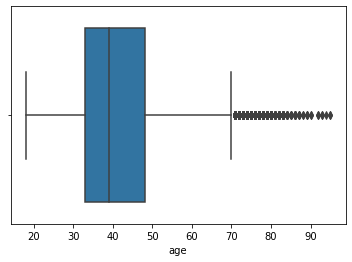

In [ ]:
sns.boxplot(df['age'])

**Finding IQR**

In [ ]:
percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  33.0
75th percentile of the data is  48.0
IQR : 15.0


**Calculating MIN and MAX values**

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

70.5
10.5


**Removing Outliers Using Capping Technique**

In [ ]:
df['age'] = np.where(
    df['age']>max_value,
    max_value,
    np.where(
        df['age']<min_value,
        min_value,
        df['age']
    ) 
)
df['age'].describe()

count    45205.000000
mean        40.869052
std         10.395247
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

**After Cleaning Outliers**

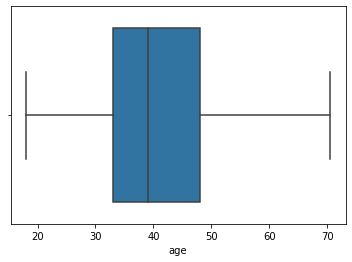

In [ ]:
sns.boxplot(df['age'])

**Checking Outliers**

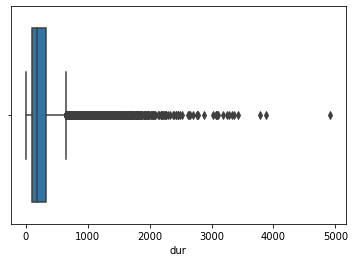

In [ ]:
sns.boxplot(df['dur'])

**Calculating IQR**

In [ ]:
percentile25 = df['dur'].quantile(0.25)
percentile75 = df['dur'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  103.0
75th percentile of the data is  319.0
IQR : 216.0


**Calculating MIN and MAX Values**

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

643.0
-221.0


**Removing Outliers By Using Capping Technique**

In [ ]:
df['dur'] = np.where(
    df['dur']>max_value,
    max_value,
    np.where(
        df['dur']<min_value,
        min_value,
        df['dur']
    ) 
)
df['dur'].describe()

count    45205.00000
mean       234.95620
std        176.75476
min          0.00000
25%        103.00000
50%        180.00000
75%        319.00000
max        643.00000
Name: dur, dtype: float64

**After Cleaning Outliers**

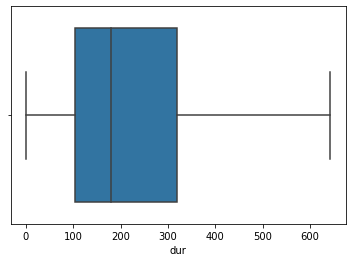

In [ ]:
sns.boxplot(df['dur'])

**Checking Outliers**

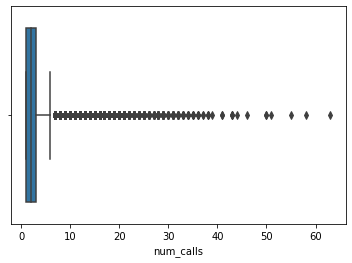

In [ ]:
sns.boxplot(df['num_calls'])

**Calculating IQR**

In [ ]:
percentile25 = df['num_calls'].quantile(0.25)
percentile75 = df['num_calls'].quantile(0.75)
print("25th percentile of the data is ",percentile25)
print("75th percentile of the data is ",percentile75)
print("IQR :", percentile75-percentile25)

25th percentile of the data is  1.0
75th percentile of the data is  3.0
IQR : 2.0


**Calculating MIN and MAX Values**

In [ ]:
max_value = percentile75 + 1.5 * (percentile75-percentile25)
min_value = percentile25 - 1.5 * (percentile75-percentile25)
print(max_value)
print(min_value)

6.0
-2.0


**Removing Outliers By Using Capping Technique**

In [ ]:
df['num_calls'] = np.where(
    df['num_calls']>max_value,
    max_value,
    np.where(
        df['num_calls']<min_value,
        min_value,
        df['num_calls']
    ) 
)
df['num_calls'].describe()

count    45205.000000
mean         2.392235
std          1.600152
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

**After Cleaning Outliers**

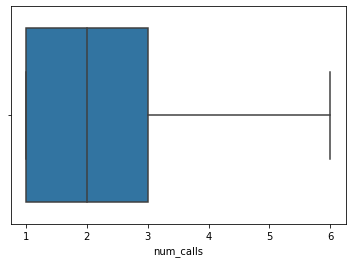

In [ ]:
sns.boxplot(df['num_calls'])

**Cleaning Categorical Columns**

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df['job'].replace(['admin.'],'admin',inplace=True)

In [ ]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

**Exploratory Data Analysis**

***EDA for Categorical Columns***

**Checking Relationship Between Job feature and Y Target**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

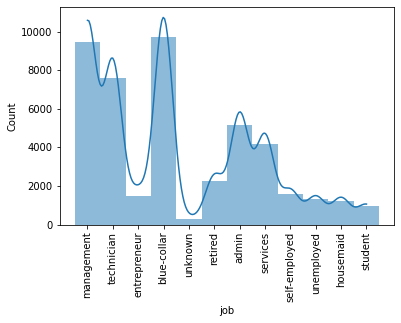

In [ ]:
sns.histplot(df.job, linewidth=0,kde=True)
plt.xticks(rotation=90)

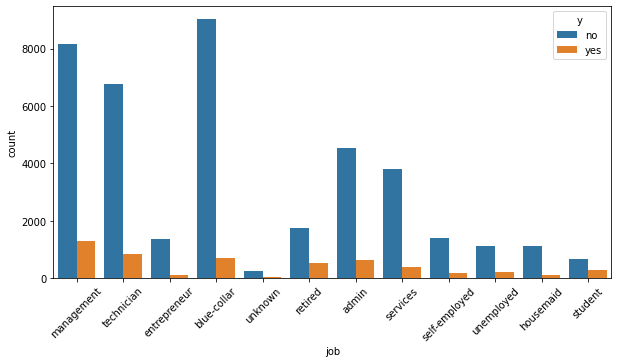

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='job', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

- The most targeted customers: Blue-collar job, but comparing with conversion rate, we end up in losing lot of money.(Better to avoid targetting Blue-collar customers a lot)
- Convertion rate is maximum: Management.
- Based on Power law distribution, ~80% of people opting for insurance is from Management and Technician.

**Checking Relationship Between marital feature and y Target**

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

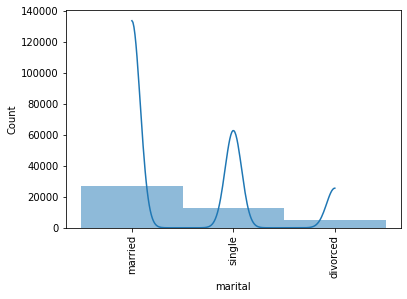

In [ ]:
sns.histplot(df.marital, linewidth=0,kde=True)
plt.xticks(rotation=90)

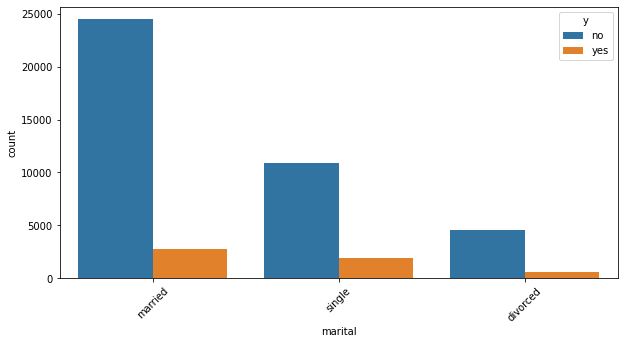

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='marital', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

- Married people are mostly opting for the insurance. 
* Divorced people are  not opting for the insurance.


**Checking Relationship in between Education_qual and y Target**

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

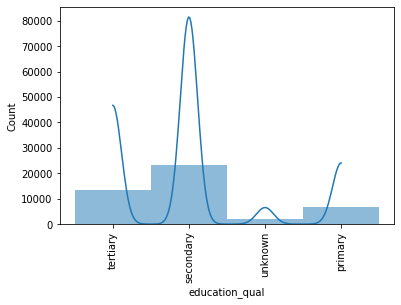

In [ ]:
sns.histplot(df.education_qual, linewidth=0,kde=True)
plt.xticks(rotation=90)

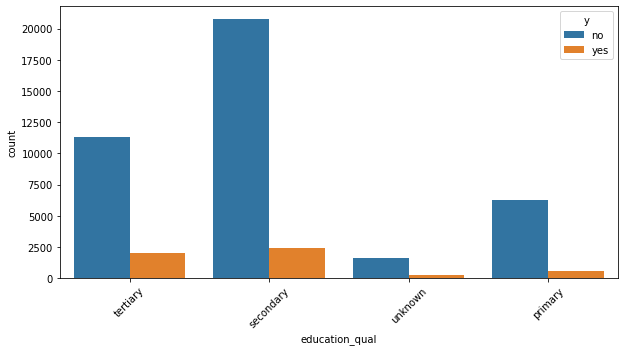

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='education_qual', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

* People with higher education(Secondary/Tertiary --> Collage/Masters)  are
option for insurance plans.

**Checking Relationship in between the Call_type feature and y target**

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

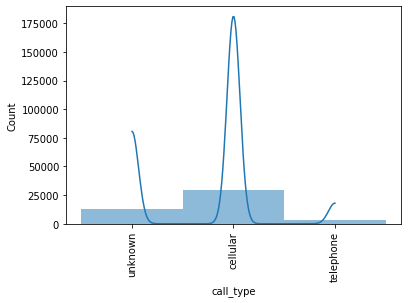

In [ ]:
sns.histplot(df.call_type, linewidth=0,kde=True)
plt.xticks(rotation=90)

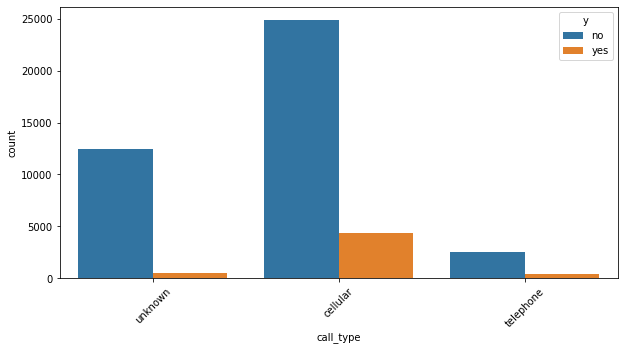

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='call_type', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

* cellular type conversation is contributing a lot towards customers opting for insurance plan.



**Checking Relationship between the month feature and y target**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

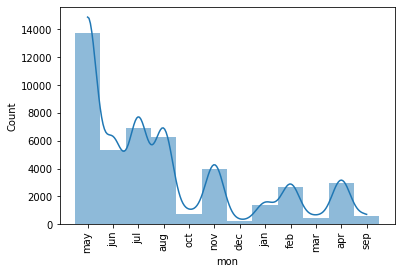

In [ ]:
sns.histplot(df.mon, linewidth=0,kde=True)
plt.xticks(rotation=90)

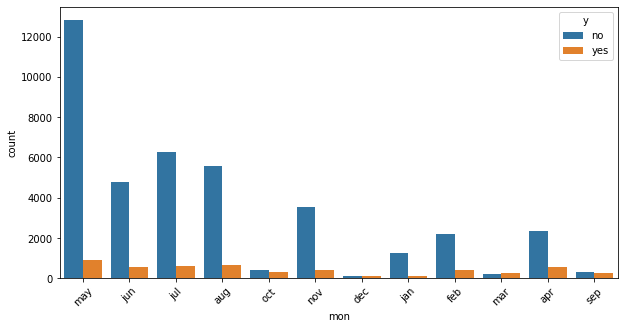

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='mon', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

- People opting for Insurance plans when targeted during start of new financial year/When they get their appraisal cycle result.

**Checking the Relationship between prev_outcome feature and y target**

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

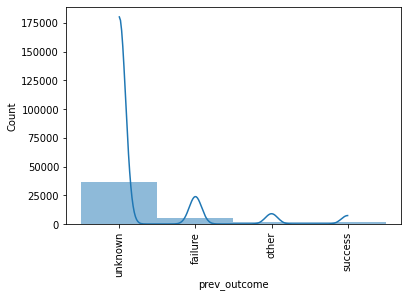

In [ ]:
sns.histplot(df.prev_outcome, linewidth=0,kde=True)
plt.xticks(rotation=90)

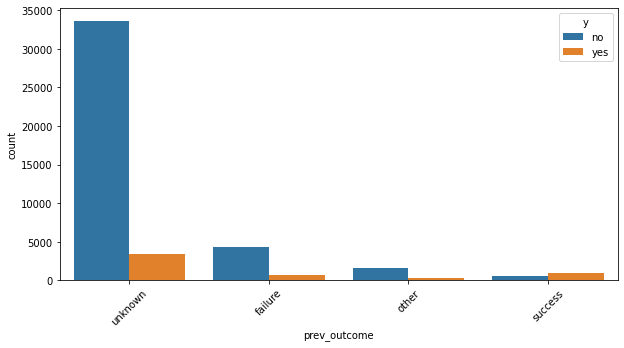

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='prev_outcome', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

* 

***EDA For Numarical Columns***

**Checking Relationship Between age feature and y target**

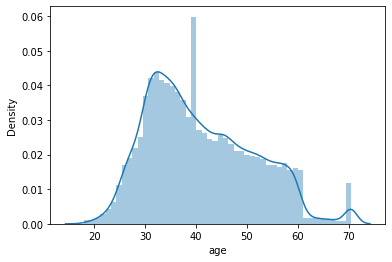

In [ ]:
sns.distplot(df['age'])

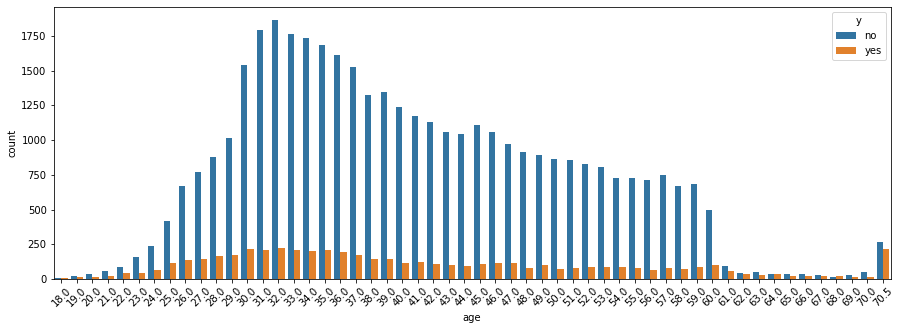

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='age', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

- People between 25 and 60 age are opting for insurance. 
- Senior citizens are not opting for insurance.
- Also people below 18 years are not opting for insurance.

**Checking Relationship in between day feature and y target**

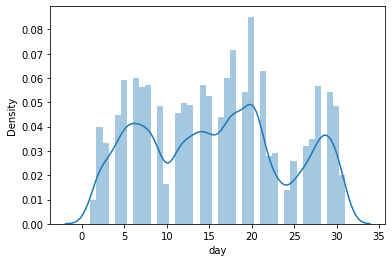

In [ ]:
sns.distplot(df['day'])

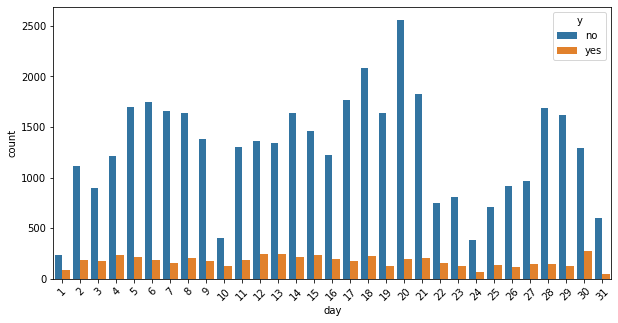

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='day', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

**Checking Relationship between Duration Feature and Y Target**

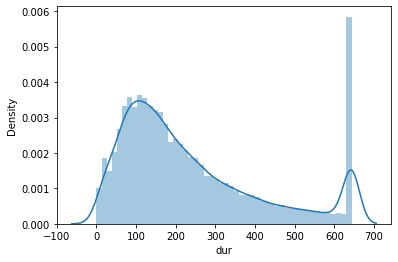

In [ ]:
sns.distplot(df['dur'])

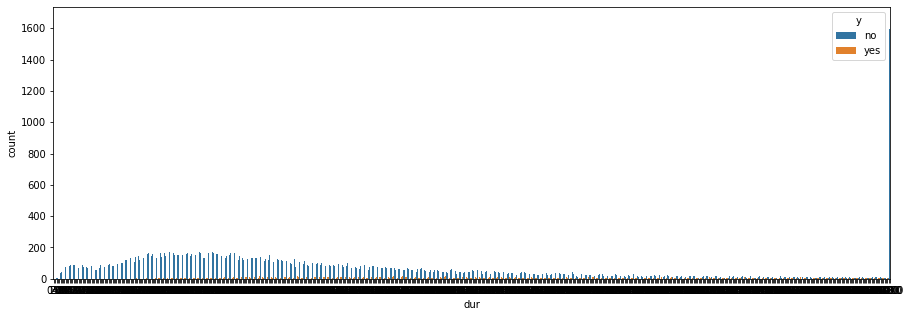

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(15,5))
sns.countplot(x='dur', hue='y', data=df)
plt.show()

**Checking Relationship in between num_calls feature and y target**

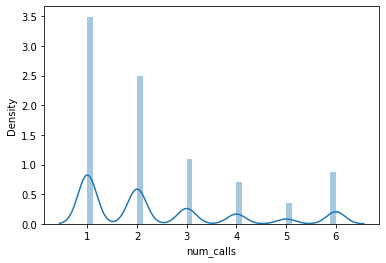

In [ ]:
sns.distplot(df['num_calls'])

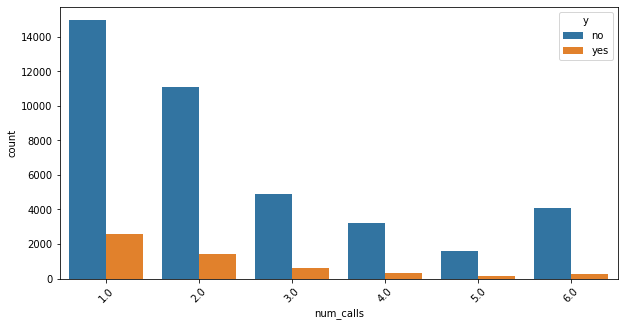

In [ ]:
fig, axes=plt.subplots(ncols=1,figsize=(10,5))
sns.countplot(x='num_calls', hue='y', data=df)
plt.xticks(rotation=45)
plt.show()

- When contacted over phone, mostly customers opting for insurance in maximum 3 attempts.
- As cost effective approach, avoid reaching customer over phone after 3 attempts.

**Checking datatypes**

In [ ]:
df.dtypes

age               float64
job                object
marital            object
education_qual     object
call_type          object
day                 int64
mon                object
dur               float64
num_calls         float64
prev_outcome       object
y                  object
dtype: object

**Change to proper datatype**

In [ ]:
df['dur'] = df['dur'].astype(int)
df['num_calls'] = df['num_calls'].astype(int)

In [ ]:
df.drop(['prev_outcome'],axis=1,inplace=True)

**Label Encoding for Ordinal Categories**

In [ ]:
df.y = df.y.map({'no': 0,'yes': 1})

**One-Hot Encoding for Nominal Categories**

In [ ]:
df=pd.get_dummies(df, columns=['job','marital','education_qual','call_type','mon','prev_outcome'])

**Final dataset after Encoding**

In [ ]:
df.head()

,age,day,dur,num_calls,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,mon_jun,mon_mar,mon_may,mon_nov,mon_oct,mon_sep,prev_outcome_failure,prev_outcome_other,prev_outcome_success,prev_outcome_unknown
0,58.0,5,261.0,1.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,44.0,5,151.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33.0,5,76.0,1.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47.0,5,92.0,1.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,33.0,5,198.0,1.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


**Splitting the data**

In [ ]:
X = df.drop('y',axis=1).values
y = df['y'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

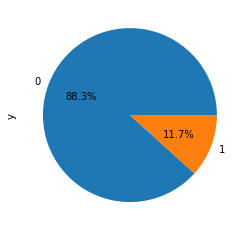

In [ ]:
df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

#**Balancing the dataset**

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

Original unbalanced dataset shape 45205
Resampled balanced dataset shape 79832


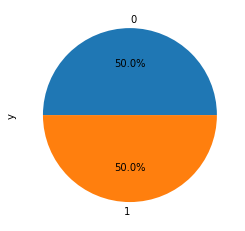

In [ ]:
x_smote, y_smote = smote.fit_resample(X,y)
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'y'))
balanced_df['y'] = y_smote
balanced_df.y.value_counts().plot(kind='pie',autopct='%1.1f%%')

In [ ]:
balanced_df.y.value_counts()

0    39916
1    39916
Name: y, dtype: int64

In [ ]:
X = balanced_df.drop(['y','prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],axis=1)
X.shape

(79832, 38)

#**Logistic Regression**

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

**Calculating AUROC Score**

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
lr.score(X_test,y_test)

0.894708901079455

**Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  train score :  0.9999410081703684  score :  0.8694510455839639
K value  :  2  train score :  0.9305666165236115  score :  0.8864406823893543
K value  :  3  train score :  0.9325723387310857  score :  0.8853195818534051
K value  :  4  train score :  0.917204967112055  score :  0.8905110438963455
K value  :  5  train score :  0.9190337138306345  score :  0.8905404293335908
K value  :  6  train score :  0.9103029230451583  score :  0.893106479149649
K value  :  7  train score :  0.9130165472082117  score :  0.8931064878487129
K value  :  8  train score :  0.9076777866265522  score :  0.8935195541903825
K value  :  9  train score :  0.9087101436451052  score :  0.8936374178047217
K value  :  10  train score :  0.9050231542931304  score :  0.8932540848628461
K value  :  20  train score :  0.89835707754476  score :  0.8930770763142762
K value  :  50  train score :  0.8948175677668643  score :  0.8930180879631925


**Calculating AUROC**

In [ ]:
knn = KNeighborsClassifier(9)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8942665015041585

#**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

**Calculating AUROC Score**

In [ ]:
roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.8584575165461755

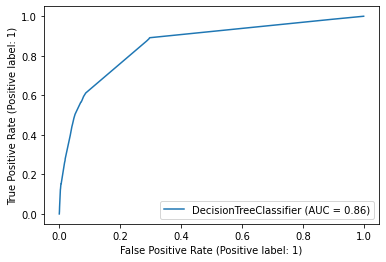

In [ ]:
plot_roc_curve(dt, X_test, y_test)

#**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
acc1 = roc_auc_score(y_test, predictions)
print("Test set auc: {:.2f}".format(acc1))

Test set auc: 0.56


**Calculating AUROC Score**

In [ ]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.9040124170060826

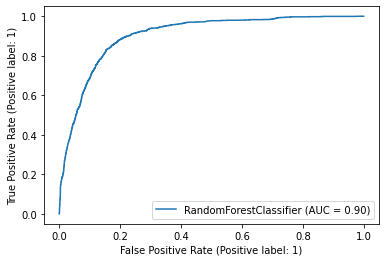

In [ ]:
plot_roc_curve(rf, X_test, y_test)

#**XG Boost**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Learning rate :  0.01  Train score :  0.900274312007787  Cross-Val score :  0.8988290625280001
Learning rate :  0.02  Train score :  0.9006282629855765  Cross-Val score :  0.8982094369183045
Learning rate :  0.03  Train score :  0.8978556469928914  Cross-Val score :  0.8975015419090443
Learning rate :  0.04  Train score :  0.8996548977966552  Cross-Val score :  0.8976196316990401
Learning rate :  0.05  Train score :  0.901424652685603  Cross-Val score :  0.8993600272802637
Learning rate :  0.06  Train score :  0.9025454974486034  Cross-Val score :  0.9003038582957317
Learning rate :  0.07  Train score :  0.9036368462967879  Cross-Val score :  0.9011002314820857
Learning rate :  0.08  Train score :  0.9051706338672094  Cross-Val score :  0.902014555273416
Learning rate :  0.09  Train score :  0.9057605521635254  Cross-Val score :  0.9026339721055822
Learning rate :  0.1  Train score :  0.9072943397339468  Cross-Val score :  0.9039612926460723
Learning rate :  0.11  Train score :  0.9077

**Calculating AUROC Score**

In [ ]:
model = xgb.XGBClassifier(learning_rate = 0.5, n_estimators=100)
model.fit(X_train,y_train) #train the model
model.score(X_test, y_test)

0.9032914528402053

#**Feature Importances**

In [ ]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)
list(zip(['age', 'day', 'dur', 'num_calls', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_qual_primary', 'education_qual_secondary',
       'education_qual_tertiary', 'education_qual_unknown',
       'call_type_cellular', 'call_type_telephone', 'call_type_unknown',
       'mon_apr', 'mon_aug', 'mon_dec', 'mon_feb', 'mon_jan', 'mon_jul',
       'mon_jun', 'mon_mar', 'mon_may', 'mon_nov', 'mon_oct', 'mon_sep',
       'prev_outcome_failure', 'prev_outcome_other', 'prev_outcome_success',
       'prev_outcome_unknown'],selector.support_))

[('age', True),
 ('day', True),
 ('dur', True),
 ('num_calls', False),
 ('y', False),
 ('job_admin.', False),
 ('job_blue-collar', False),
 ('job_entrepreneur', False),
 ('job_housemaid', False),
 ('job_management', False),
 ('job_retired', False),
 ('job_self-employed', False),
 ('job_services', False),
 ('job_student', False),
 ('job_technician', False),
 ('job_unemployed', False),
 ('job_unknown', False),
 ('marital_divorced', False),
 ('marital_married', False),
 ('marital_single', False),
 ('education_qual_primary', False),
 ('education_qual_secondary', False),
 ('education_qual_tertiary', False),
 ('education_qual_unknown', False),
 ('call_type_cellular', False),
 ('call_type_telephone', False),
 ('call_type_unknown', False),
 ('mon_apr', False),
 ('mon_aug', False),
 ('mon_dec', False),
 ('mon_feb', False),
 ('mon_jan', False),
 ('mon_jul', False),
 ('mon_jun', False),
 ('mon_mar', False),
 ('mon_may', False),
 ('mon_nov', False),
 ('mon_oct', False),
 ('mon_sep', False),
 ('pre

#**Conclusion**

**Logistic Regression -**  **0.89**

   **K Nearest Neighbours -**  **0.89**

   **Decision Tree -**  **0.86**

   **Random Forest -**   **0.91**

   **XG Boost -**   **0.90**

 The best Machine Learning algorithm for Customer conversion Prediction is **RANDOM FOREST** Model